In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [4]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#这次我们做20层
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
#结果层
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [6]:
model.layers

In [7]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
#     keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1638 - val_loss: 2.2998 - val_accuracy: 0.1786
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2974 - accuracy: 0.1793 - val_loss: 2.2938 - val_accuracy: 0.1966
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2877 - accuracy: 0.2056 - val_loss: 2.2789 - val_accuracy: 0.2020
Epoch 4/100
1719/1719 [==============================] - 8s 4ms/step - loss: 2.2620 - accuracy: 0.2091 - val_loss: 2.2342 - val_accuracy: 0.1992
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 2.1147 - accuracy: 0.1910 - val_loss: 1.9111 - val_accuracy: 0.1938
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.8098 - accuracy: 0.2266 - val_loss: 1.6998 - val_accuracy: 0.2954
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4095 - accuracy: 0.4157 - val_loss: 1.1847 - val_ac

1719/1719 [==============================] - 7s 4ms/step - loss: 0.2860 - accuracy: 0.9041 - val_loss: 0.4703 - val_accuracy: 0.8524
Epoch 58/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9039 - val_loss: 0.5363 - val_accuracy: 0.8338
Epoch 59/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2825 - accuracy: 0.9056 - val_loss: 0.4702 - val_accuracy: 0.8536
Epoch 60/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2760 - accuracy: 0.9072 - val_loss: 0.4522 - val_accuracy: 0.8622
Epoch 61/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2719 - accuracy: 0.9087 - val_loss: 0.4617 - val_accuracy: 0.8584
Epoch 62/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2692 - accuracy: 0.9093 - val_loss: 0.4609 - val_accuracy: 0.8694
Epoch 63/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2654 - accuracy: 0.9114 - val_loss: 0.4374 - val_accuracy

In [8]:
history.history

{'loss': [2.301309823989868,
  2.297381639480591,
  2.2876715660095215,
  2.261967658996582,
  2.1146533489227295,
  1.8098090887069702,
  1.4095103740692139,
  1.047321081161499,
  0.910505473613739,
  0.8342798948287964,
  0.7846556305885315,
  0.7437471747398376,
  0.7115402817726135,
  0.6761443614959717,
  0.6464729309082031,
  0.617030918598175,
  0.590506374835968,
  0.573889434337616,
  0.5598474740982056,
  0.5365724563598633,
  0.5250551700592041,
  0.5090031027793884,
  0.4982246160507202,
  0.48799657821655273,
  0.4754226803779602,
  0.46711108088493347,
  0.4569458067417145,
  0.44815102219581604,
  0.4398774206638336,
  0.4324687123298645,
  0.4224192500114441,
  0.41527971625328064,
  0.41016528010368347,
  0.40200984477996826,
  0.39263278245925903,
  0.3877943456172943,
  0.38002660870552063,
  0.37227150797843933,
  0.36795923113822937,
  0.36416903138160706,
  0.356458842754364,
  0.35025763511657715,
  0.34616005420684814,
  0.3395989239215851,
  0.3335822224617004

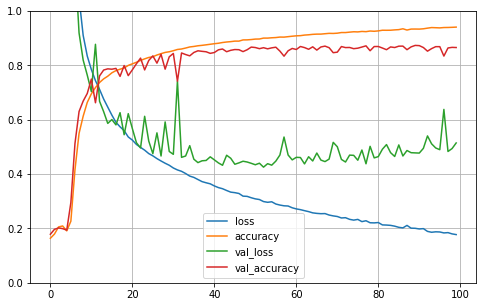

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

#如果初期变化效果不明显
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导，前期参数太多

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.5638871192932129, 0.8508999943733215]